In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import collections
from collections import Counter
from statistics import mean #per la media

from grafici import htlc_distribution, feebase_distribution, feerate_distribution

In [3]:
#leggo il grafo dal file .gml 
#ln = nx.read_gml('output\grafi\grafodef.gml')

ln = nx.read_gml('grafonew.gml')

In [4]:
numnodi = len(ln.nodes())
numarchi = len(ln.edges())

print(numnodi)
print(numarchi)

11044
42974


## *Def:*
### **min_htcl:** *valore minimo (espresso in msat) per cui un nodo è disposto a fare il forward di un pagamento*
### **fee_base:**  *tariffa fissa (espressa in mSat) addebitata su ogni transazione instradata attraverso un certo nodo*
### **fee_rate:** : *millisatoshi aggiuntivi richiesti per ogni milione di satoshi inviati*



In [4]:
#per calcolare le distribuzioni

htlc1 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC1') ]
htlc2 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC2')]
htlc = htlc1+htlc2 
feebase1 = [c for (u, v, c) in ln.edges.data('FEEBASE1')]
feebase2 = [c for (u, v, c) in ln.edges.data('FEEBASE2')]
feebase = feebase1 + feebase2
feerate1 = [int(c) for (u, v, c) in ln.edges.data('FEERATE1')]
feerate2 = [int(c) for (u, v, c) in ln.edges.data('FEERATE2')]
feerate = feerate1 + feerate2

In [6]:
htlccounter = collections.Counter(htlc)
feebasecounter = collections.Counter(feebase)
fee2 = collections.Counter(feerate2)
feeratecounter = collections.Counter(feerate)

### **HTLC**

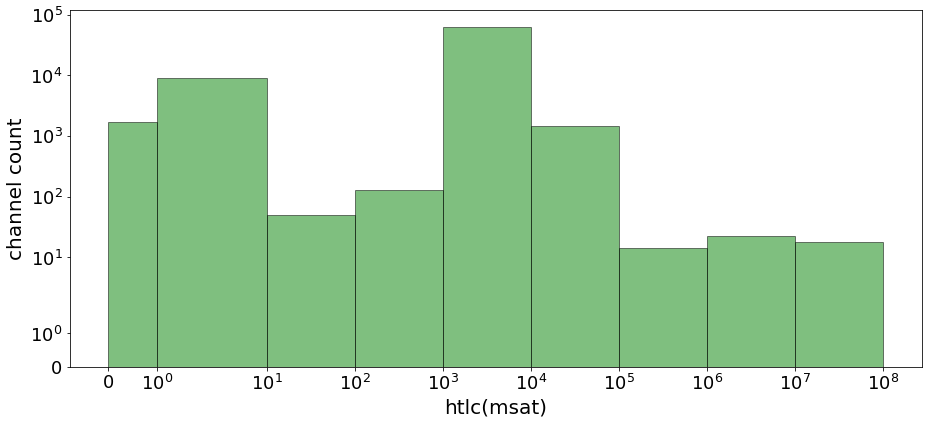

In [12]:
#calcolo istogramma della distrubuzione dei valori di htlc
htlc_distribution(htlc)

In [36]:
#percentuali dei canali 

zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0


for key in htlccounter.keys():
    #if int(key) <= 0 :
    #    zero += htclcounter[key]
    if int(key) <= 1 and int(key) >= 0:
        uno += htlccounter[key]
    if int(key) <= 10 :
        dieci += htlccounter[key]
    if int(key) <= 100 :
        cento += htlccounter[key]
    if int(key) == 1000 :
        mille += htlccounter[key]
#   if int(key) <= 10000 :
#       diecimila += htclcounter[key]
    if int(key) <= 100000 :
        centok += htlccounter[key]
    if int(key) <= 1000000 :
        milione+= htlccounter[key]
    if int(key) <= 10000000 :
        dieciM+= htlccounter[key] 
    if int(key) <= 100000000 :
        centoM+= htlccounter[key]
        
print("La percentuale di canali con minhtlc <= 1 è ", str(round(uno*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10 è ", str(round(dieci*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100 è ", str(round(cento*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000 è ", str(round(mille*100/len(htlc),3)), "%")
#print("La percentuale di canali con minhtcl <= 10000 è ", str(round(diecimila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtlc <= 100000 è ", str(round(centok*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000000 è ", str(round(milione*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10000000 è ", str(round(dieciM*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100000000 è ", str(round(centoM*100/len(htlc),3)), "%")


La percentuale di canali con minhtlc <= 1 è  12.359 %
La percentuale di canali con minhtlc <= 10 è  25.574 %
La percentuale di canali con minhtlc <= 100 è  25.723 %
La percentuale di canali con minhtlc <= 1000 è  72.424 %
La percentuale di canali con minhtlc <= 100000 è  99.948 %
La percentuale di canali con minhtlc <= 1000000 è  99.979 %
La percentuale di canali con minhtlc <= 10000000 è  99.994 %
La percentuale di canali con minhtlc <= 100000000 è  100.0 %


### **FEE_BASE**

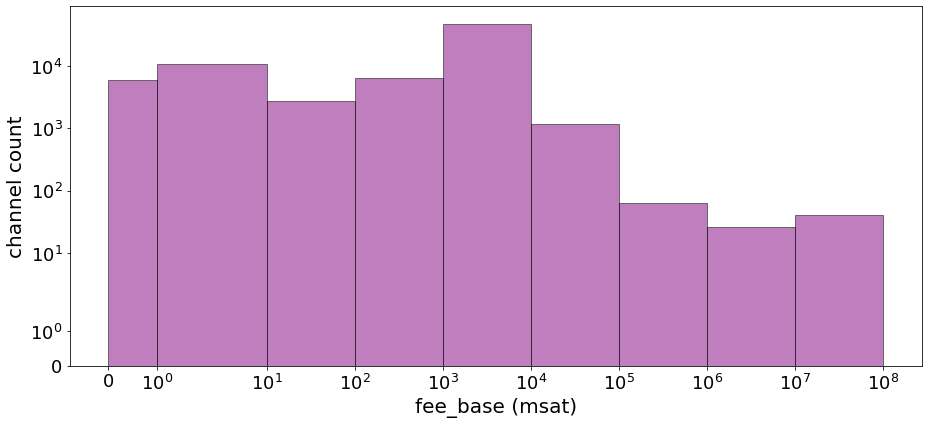

In [14]:
feebase_distribution(feebase)

In [15]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0
miliardo = 0

for key in feebasecounter.keys():
    if int(key) <= 1 :
        uno += feebasecounter[key]
    if int(key) <= 10 :
        dieci += feebasecounter[key]
    if int(key) <= 100 :
        cento += feebasecounter[key]
    if int(key) <= 1000 :
        mille += feebasecounter[key]
    if int(key) <= 100000 :
        centok += feebasecounter[key]
    if int(key) <= 1000000 :
        milione += feebasecounter[key]
    if int(key) <= 10000000 :
        dieciM += feebasecounter[key]
    if int(key) <= 100000000:
        centoM += feebasecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feebasecounter[key]
        
        
print("La percentuale di canali con feebase <= 1 è ", str(round(uno*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10 è ", str(round(dieci*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100 è ", str(round(cento*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000 è ", str(round(mille*100/len(feebase),3)), "%")
#print("La percentuale di canali con feebase <= 10000 è ", str(round(diecimila*100/len(feerate),3)), "%")
print("La percentuale di canali con feebase <= 100000 è ", str(round(centok*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000 è ", str(round(milione*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10000000 è ", str(round(dieciM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100000000 è ", str(round(centoM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000000 è ", str(round(miliardo*100/len(feebase),3)), "%")

La percentuale di canali con feebase <= 1 è  31.271 %
La percentuale di canali con feebase <= 10 è  33.538 %
La percentuale di canali con feebase <= 100 è  37.188 %
La percentuale di canali con feebase <= 1000 è  93.322 %
La percentuale di canali con feebase <= 100000 è  99.874 %
La percentuale di canali con feebase <= 1000000 è  99.908 %
La percentuale di canali con feebase <= 10000000 è  99.967 %
La percentuale di canali con feebase <= 100000000 è  99.97 %
La percentuale di canali con feebase <= 1000000000 è  100.0 %


### **FEE_RATE**

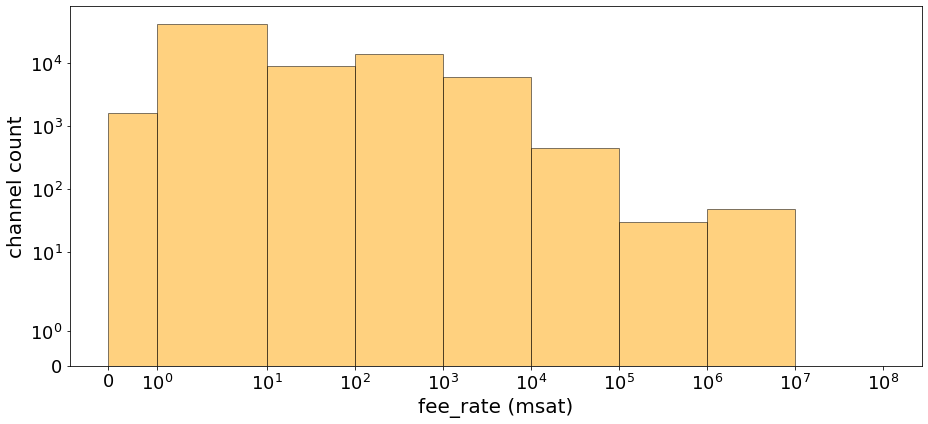

In [16]:
feerate_distribution(feerate)

In [17]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
miliardo = 0

for key in feeratecounter.keys():
    if int(key) <= 1 :
        uno += feeratecounter[key]
    if int(key) <= 10 :
        dieci += feeratecounter[key]
    if int(key) <= 100 :
        cento += feeratecounter[key]
    if int(key) <= 1000 :
        mille += feeratecounter[key]
    if int(key) <= 10000 :
        diecik += feeratecounter[key]
    if int(key) <= 100000 :
        centok += feeratecounter[key]
    if int(key) <= 1000000 :
        milione += feeratecounter[key]
    if int(key) <= 10000000 :
        dieciM += feeratecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feeratecounter[key]
        
        
print("La percentuale di canali con feerate <= 1 è ", str(round(uno*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10 è ", str(round(dieci*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100 è ", str(round(cento*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000 è ", str(round(mille*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000 è ", str(round(diecik*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100000 è ", str(round(centok*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000 è ", str(round(milione*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000000 è ", str(round(dieciM*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000000 è ", str(round(miliardo*100/len(feerate),3)), "%")

La percentuale di canali con feerate <= 1 è  63.441 %
La percentuale di canali con feerate <= 10 è  68.719 %
La percentuale di canali con feerate <= 100 è  79.275 %
La percentuale di canali con feerate <= 1000 è  96.043 %
La percentuale di canali con feerate <= 10000 è  99.465 %
La percentuale di canali con feerate <= 100000 è  99.881 %
La percentuale di canali con feerate <= 1000000 è  99.95 %
La percentuale di canali con feerate <= 10000000 è  99.962 %
La percentuale di canali con feerate <= 1000000000 è  99.998 %


# ***ROOTS***

In [27]:
root_prop= {} #struttura per memorizzare i nodi radice e le loro proprietà

all_nodes = [node for node in ln.nodes() if ln.degree(node) >=3]


for node in all_nodes:
    
    for n in ln.neighbors(node): #scorro i vicini
        if ln.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int } 
    
    #if one == 1: #se tutti i vicini hanno grado = 1 (sono rose)
        

for node in root_prop.keys():
    for n in ln.neighbors(node): 
        if ln.degree(n) == 1:
            root_prop[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop[node]['degree'] = (ln.degree(node))
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop[node]['percent_roses']=(float(len(root_prop[node]['roses']) / ln.degree(node) * 100)) 

In [28]:
print(len(root_prop))

814


In [151]:
#memorizzo la componente principale
largest_component = ln.subgraph(max(nx.connected_components(ln),key=len))
nx.write_gml(largest_component, "largest_component.gml") 

In [ ]:
#ln_largest = nx.read_gml("largest_component.gml")

In [152]:
#applico l'algoritmo di ricerca dei nodi radice solo alla componente principale, mi aspetto che vengano individuati meno nodi 
#rispetto al caso precedente che presumibilmente individuava anche i nodi "nel contorno della rete"

root_prop_largest = {} #struttura per memorizzare i nodi radice e le loro proprietà

nodes = [node for node in largest_component.nodes() if largest_component.degree(node) >=3]

for node in nodes:
    for n in largest_component.neighbors(node): #scorro i vicini
        if largest_component.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop_largest[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int} 
        

for node in root_prop_largest.keys():
    for n in largest_component.neighbors(node): 
        if largest_component.degree(n) == 1:
            root_prop_largest[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop_largest[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop_largest[node]['degree'] = largest_component.degree(node)
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop_largest[node]['percent_roses'] = float(len(root_prop_largest[node]['roses']) / largest_component.degree(node) * 100)


In [30]:
len(root_prop_largest)

812

In [35]:
#percentuale dei nodi root nella largest_component
perc_roots_largest = int(len(root_prop_largest) / len(root_prop) * 100)
print("Il ", perc_roots_largest, " % dei nodi radice si trova nella componente centrale. ")

Il  99  % dei nodi radice si trova nella componente centrale. 


In [31]:
#percentuale dei nodi root sul totale:
perc_roots = int(len(root_prop_largest) / largest_component.number_of_nodes() * 100)
print("I nodi root sono il ",perc_roots,"% dei nodi totali")

I nodi root sono il  7 % dei nodi totali


### Aggiungo attributo 'ISROOT' ai nodi radice per visualizzazione con graphia

In [32]:
node_attr = {}

for node in largest_component.nodes():
    new = {'ISROOT' : 1 if node in root_prop_largest.keys() else 0}
    node_attr[node] = new
nx.set_node_attributes(largest_component, node_attr)


In [ ]:
#nx.write_gml(largest_component, "grafo_root812.gml") #grafo ottenuto con l'algoritmo precedente ma la condizione affinchè un nodo sia key della struttura è solo che uno dei suoi vicini abbia grado1

In [ ]:
#grafo con condizione sui vicini: grado 1 o grado 2 
#nx.write_gml(largest_component, "grafo_root1295.gml")

In [ ]:
#?
#memorizzo i nodi che sono collegati a più nodi rossi (rose) che blu
selected_nodes = {}

for node in root_prop_largest.keys():
    if(root_prop_largest[node]['percent_roses'] > 40 and largest_component.degree(node) >=4 ):
        selected_nodes[node]= root_prop_largest[node]

In [ ]:
len(selected_nodes)

30

In [ ]:
#provo ad individuare altri nodi radice (??)
bouquet_roots = {}

for n in largest_component.nodes():
    #considero come rose nodi di grado 2 
    roses = [nbr for nbr in largest_component.neighbors(n) if largest_component.degree(nbr) == 2]

    if(len(roses) == 2):
        
        bouquet_roots[n] = {'degree' : int, 'roses2': []}

        bouquet_roots[n]['degree'] = (largest_component.degree(n))
        bouquet_roots[n]['roses2'].append(roses[0])
        bouquet_roots[n]['roses2'].append(roses[1])


In [ ]:
roots2 = {}
nodi = []

for n in bouquet_roots.keys():

    roots2[n] = {'neig_0' : [], 'neig_1': []}

    n0 = [nbr for nbr in largest_component.neighbors(bouquet_roots[n]['roses2'][0])]
    n1 = [nbr for nbr in largest_component.neighbors(bouquet_roots[n]['roses2'][1])]

    roots2[n]['neig_0'] = n0
    roots2[n]['neig_1'] = n1

    if( bouquet_roots[n]['roses2'][1] in n0 and n in n0 and bouquet_roots[n]['roses2'][0] in n1 and n in n1):
        nodi.append(n)

In [ ]:
#provo a trovare altri nodi radice:

roots = []
for n in largest_component.nodes(): #per ogni nodo del grafo
    if n not in root_prop_largest.keys(): #se non compare nella struttura dei nodi roots

        neighborgs = [nbr for nbr in largest_component.neighbors(n)] #memorizzo i suoi vicini

        #se tra i vicini del nodo ci sono almeno 3 nodi radice 
        if(len(set(neighborgs) & set(root_prop_largest.keys())) >=5 and largest_component.degree(n) <=5) :
            roots.append(n)


## Trasformo il multigrafo in Grafo, facendo la media delle componenti degli archi

In [28]:
G = nx.Graph()

for edge in ln.edges(data=True,keys=True):

    u = edge[0]
    v = edge[1]

    k = edge[2]

    if not G.has_edge(u,v):

        G.add_edge(u,v)
        htlc1 = mean(d.get('HTLC1',-1) for d in ln.get_edge_data(u,v).values())
        htlc2 = mean(d.get('HTLC2',-1) for d in ln.get_edge_data(u,v).values())
        feebase1 = mean(d.get('FEEBASE1',-1) for d in ln.get_edge_data(u,v).values())
        feebase2 = mean(d.get('FEEBASE2',-1) for d in ln.get_edge_data(u,v).values())
        feerate1 = mean(d.get('FEERATE1',-1) for d in ln.get_edge_data(u,v).values())
        
        feerate2 = mean(int(d.get('FEERATE2',-1)) for d in ln.get_edge_data(u,v).values())

        G[u][v]['ID'] = k
        G[u][v]['HTLC1'] = htlc1
        G[u][v]['HTLC2'] = htlc2
        G[u][v]['FEEBASE1'] = feebase1
        G[u][v]['FEEBASE2'] = feebase2
        G[u][v]['FEERATE1'] = feerate1
        G[u][v]['FEERATE2'] = feerate2


In [30]:
betw = nx.betweenness_centrality(G, seed=0)
print("Betweenness - FATTO")

Betweenness - FATTO


In [ ]:
#salva in file
#np.save('filebetweenness.npy',betw) 

#leggi in dict
#new_dict = np.load('filebetweenness.npy', allow_pickle='TRUE')


In [161]:
'023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f' in root_prop_largest.keys()

True

In [112]:
outline = [ key for key, value in betw.items() if value >= 0.04]

In [174]:
dict_outline = {}

for n in outline:

    for edges in G.edges(data=True):

        u = edges[0]
        v = edges[1]

        if n == u :
            dict_outline[n] = { 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}
            
            #dict_outline['node'].append(n) 
            dict_outline[n]['edge_id'].append(G[u][v]['ID']) 
            dict_outline[n]['htlc'].append(G[u][v]['HTLC1']) 
            dict_outline[n]['feebase'].append(G[u][v]['FEEBASE1'])
            dict_outline[n]['feerate'].append(G[u][v]['FEERATE1'])
        elif n == v :
            dict_outline[n] = { 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

            #dict_outline[n]['betw'].append(val) 
          
            dict_outline[n]['edge_id'].append(G[u][v]['ID']) 
            dict_outline[n]['htlc'].append(G[u][v]['HTLC2']) 
            dict_outline[n]['feebase'].append(G[u][v]['FEEBASE2'])
            dict_outline[n]['feerate'].append(G[u][v]['FEERATE2'])


In [180]:
display(dict_outline)

{'0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266': {'edge_id': ['748547516252225536'],
  'htlc': [-1],
  'feebase': [1000],
  'feerate': [1]},
 '0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c': {'edge_id': ['748436465565171713'],
  'htlc': [-1],
  'feebase': [10000],
  'feerate': [5000]},
 '03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f': {'edge_id': ['748522227484327937'],
  'htlc': [-1],
  'feebase': [1000],
  'feerate': [100]},
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b': {'edge_id': ['748517829404786689'],
  'htlc': [-1],
  'feebase': [1],
  'feerate': [1000]},
 '0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3': {'edge_id': ['748542018770960385'],
  'htlc': [-1],
  'feebase': [1000],
  'feerate': [1]},
 '02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2': {'edge_id': ['748333111459512321'],
  'htlc': [-1],
  'feebase': [1000],
  'feerate': [0]},
 '03abf6f44c355d

In [172]:
for i in range(len(dict_outline)):
    

{'node': ['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
  '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82

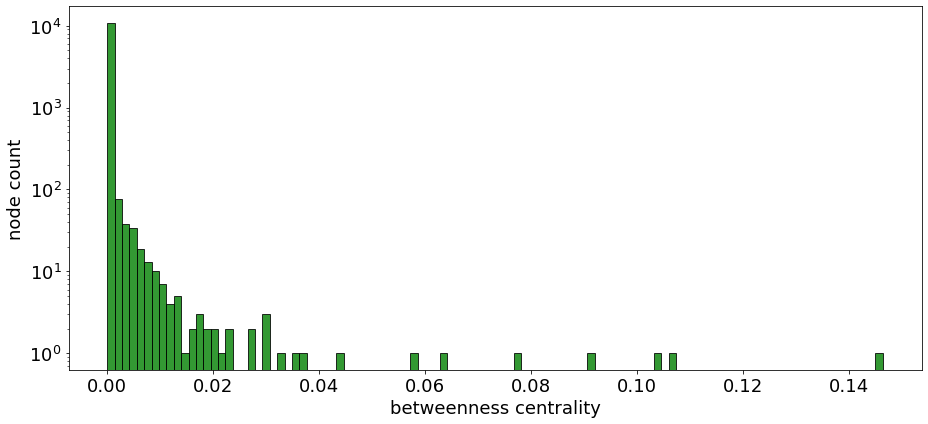

In [97]:
plt.figure(figsize=(13,6))
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.xlabel('betweenness centrality', fontsize=18)
    
n = len(betw)
bins = int(n**(1/float(2))) 

plt.ylabel('node count', fontsize=18)
plt.yscale('log')
plt.hist(betw.values(), bins = bins, edgecolor='black', alpha = 0.8, color='green')
plt.tight_layout()
    #plt.savefig(os.path.join(DIR  + filename))

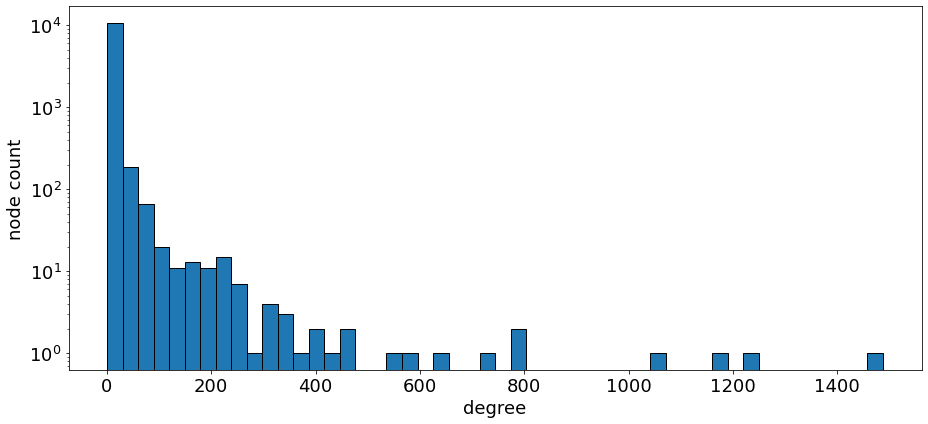

In [163]:
    #istogramma: distribuzione del grado dei nodi
    #gradi dei nodi della LN passata come argomento
    degrees = [G.degree(node) for node in G.nodes()]

    n = len(degrees)
    bins=50
    

    plt.figure(figsize=(13,6))
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    #plt.xticks(range(0, 1400, 50), rotation=45)
    plt.xlabel('degree', fontsize=18)
    plt.ylabel('node count',fontsize=18)
    plt.yscale('log')
    plt.hist(degrees, bins = bins, edgecolor = 'black')
    plt.tight_layout()